# Data Collection
**Paula's Choice Ingredient Dictionary**

To analyze the ingredients from the Sephora website, I will need a means to assess the different ingredients in the products sold by Sephora. To do this, I will use a web scrapper to gather data from the Paula's Choice website, specficially their "Ingredient Dictionary". I am using Paula's Choice because it is a reliable and trusted source of skincare and dermatology information. 

In [ ]:
# import statements
import requests
from requests import get
from bs4 import BeautifulSoup

# Key : value => Category : url
# I will use this dictionary to access all the links for the corresponding categories
categories = {"Absorbent":"https://www.paulaschoice.com/ingredient-dictionary/absorbent",
              "Anti-acne":"https://www.paulaschoice.com/ingredient-dictionary/anti-acne",
              "Antioxidant":"https://www.paulaschoice.com/ingredient-dictionary/antioxidants",
              "Cleansing Agents":"https://www.paulaschoice.com/ingredient-dictionary/cleansing-agents",
              "Coloring Agents/Pigments":"https://www.paulaschoice.com/ingredient-dictionary/coloring-agents%2Fpigments",
              "Emollients":"https://www.paulaschoice.com/ingredient-dictionary/emollients",
              "Emulsifiers":"https://www.paulaschoice.com/ingredient-dictionary/emulsifiers",
              "Exfoliants":"https://www.paulaschoice.com/ingredient-dictionary/exfoliant",
              "Film Forming Agents":"https://www.paulaschoice.com/ingredient-dictionary/film-forming-agents",
              "Film-Forming/Holding Agents":"https://www.paulaschoice.com/ingredient-dictionary/film-forming%2Fholding-agents",
              "Fragrance: Synthetic and Fragrant Plant Extracts":"https://www.paulaschoice.com/ingredient-dictionary/fragrance-synthetic-and-fragrant-plant-extracts",
              "Hydration":"https://www.paulaschoice.com/ingredient-dictionary/hydration",
              "Miscellaneous":"https://www.paulaschoice.com/ingredient-dictionary/miscellaneous",
              "Plant Extracts":"https://www.paulaschoice.com/ingredient-dictionary/plant-extracts",
              "Preservatives":"https://www.paulaschoice.com/ingredient-dictionary/preservatives",
              "Scrub Agents":"https://www.paulaschoice.com/ingredient-dictionary/scrub-agents",
              "Sensitizing":"https://www.paulaschoice.com/ingredient-dictionary/sensitizing",
              "Silicones":"https://www.paulaschoice.com/ingredient-dictionary/silicones",
              "Skin Replenishing":"https://www.paulaschoice.com/ingredient-dictionary/skin-replenishing",
              "Skin Restoring": "https://www.paulaschoice.com/ingredient-dictionary/skin-restoring",
              "Skin Softening":"https://www.paulaschoice.com/ingredient-dictionary/skin-softening",
              "Skin Soothing":"https://www.paulaschoice.com/ingredient-dictionary/skin-soothing",
              "Slip Agents":"https://www.paulaschoice.com/ingredient-dictionary/slip-agents",
              "Sunscreen Actives":"https://www.paulaschoice.com/ingredient-dictionary/sunscreen-actives",
              "Texture Enhancer":"https://www.paulaschoice.com/ingredient-dictionary/texture-enhancer",
              "Thickeners":"https://www.paulaschoice.com/ingredient-dictionary/thickeners",
              "Thickeners/Emulsifiers":"https://www.paulaschoice.com/ingredient-dictionary/thickeners%2Femulsifiers"}

# ingredient dictionary with empty lists to be filled with ingredient names from Paula's Choice website
ing_list = {"Absorbent":[],"Anti-acne":[], "Antioxidant":[],"Cleansing Agents":[], "Coloring Agents/Pigments":[], "Emollients":[],
            "Emulsifiers":[],"Exfoliants":[], "Film Forming Agents":[],"Film-Forming/Holding Agents":[],
            "Fragrance: Synthetic and Fragrant Plant Extracts":[],"Hydration":[], "Miscellaneous":[], "Plant Extracts":[],"Preservatives":[],"Scrub Agents":[],"Sensitizing":[],
            "Silicones":[],"Skin Replenishing":[],"Skin Restoring":[],"Skin Softening":[],"Skin Soothing":[],"Slip Agents":[],
            "Sunscreen Actives":[], "Texture Enhancer":[], "Thickeners":[], "Thickeners/Emulsifiers":[]}

# Iterate through all the links and looking for class="name inname ingredient-name" as this holds the ingredient names
# then put the ingredient names in the list for the corresponding category key
for count, el in enumerate(categories):
    url = categories[el]
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')

    ing_name_title = soup.find_all(class_ = "name ingredient-name")
    for i in ing_name_title:
      del i['href']
      del i['h2']
      name = i.get_text()
      name = name.strip('\n')
      ing_list[el].append(name)

#print(ing_list)

**Sephora Website Dataset from Kaggle**

I obtained a dataset of the Sephora website from Kaggle.

I downloaded the csv file and am reading it into a dataframe.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files 
uploaded = files.upload()

Saving sephora_website_dataset.csv to sephora_website_dataset.csv


In [ ]:
df = pd.read_csv('sephora_website_dataset.csv') 
print(df)

           id               brand  ... limited_edition limited_time_offer
0     2218774      Acqua Di Parma  ...               0                  0
1     2044816      Acqua Di Parma  ...               0                  0
2     1417567      Acqua Di Parma  ...               0                  0
3     1417617      Acqua Di Parma  ...               0                  0
4     2218766      Acqua Di Parma  ...               0                  0
...       ...                 ...  ...             ...                ...
9163  2208502  SEPHORA COLLECTION  ...               1                  0
9164  2298909  SEPHORA COLLECTION  ...               0                  0
9165  2236750  SEPHORA COLLECTION  ...               0                  0
9166       50  SEPHORA COLLECTION  ...               0                  0
9167      304  SEPHORA COLLECTION  ...               0                  0

[9168 rows x 21 columns]


# Data Cleaning and Preparation

**Paula's Choice Ingredient Dictionary** 

To best utilize the Paula's Choice Ingredient Dictionary I will be doing three things things:

1. Since, Sephora is a French brand they perfer to refer to fragrance as "parfum" and include the American translation "fragrance" paranthesis. However, Paula's Choice, being an American brand, only refers to "fragrance" as "fragrance". I will update the Paula's Choice ingredient dictionary to reflect Sephora's choice so there is no mistakes in future comparisons and analysis.

In [ ]:
for count, ind in enumerate(ing_list["Fragrance: Synthetic and Fragrant Plant Extracts"]):
  if ind == "fragrance":
    ing_list["Fragrance: Synthetic and Fragrant Plant Extracts"][count] = "parfum (fragrance)"

2. I will be converting the Paula's Choice Ingredient dictionary into a pandas dataframe so I can easily reference it when analyzing the Sephora Website dataframe.

In [ ]:
pc_df = pd.DataFrame.from_dict(ing_list,orient='index').transpose()

#print(pc_df)

3. I will create a copy of the original Paula's Choice dictionary were the ingredients are all lowercase and there are no spaces. I will be utilizing this dictionary to create an ingredient dataframe for the products on the Sephora webste. The lowercase letters and lack of spaces will help aid the analysis.

In [ ]:
comp_ing_dict = {}

for k in ing_list:
  for count, el in enumerate(ing_list[k]):
    comp_ing_dict[k] = ing_list[k][count].lower().replace(' ','')

#print(comp_ing_dict)

**Sephora Website Dataframe**

Now, I will clean the Sephora Website Dataframe.

Since I am only interested in investigating Sephora's skincare, I will begin by removing any products that are not related to skincare, for example: perfume, cologne, deodorant, hair styling products, makeup, etc

In [ ]:
skincare_terms = ['Moisturizers', 'Face Serums', 'Face Wash & Cleansers', 'Face Masks', 'Eye Creams & Treatments', 
                  'Toners', 'Face Oils', 'Face Sunscreen', 'Sheet Masks', 'Facial Peels', 'Skincare', 'Exfoliators',
                  'Face Sets', 'Anti-Aging', 'For Face']

df1 = df[df['category'].isin(skincare_terms)].reset_index()

The Sephora website dataset also contains many columns that I do not plan to use; for example: "id", "brand", "limited_time_offer","limited_edition". 
To ensure that the dataframe only contains columns that I will potentially use, I will limit it to containing only the following columns: 'name', 'rating', 'love', 'price', 'details', 'ingredients'

In [ ]:
seph_df = df1[['name', 'rating', 'love', 'price', 'details', 'ingredients']]

#print(seph_df)

To help make future analysis easier, I will also convert all contents of the dataframe to lowercase for consistency.

In [ ]:

seph_df = seph_df.applymap(lambda s:s.lower() if type(s) == str else s)

#print(seph_df)

In the "ingredients" of the Sephora website database there is a section in the bottom included in their "Clean at Sephora Products" that states:

"Clean at Sephora products are formulated without:

Sulfates—SLS + SLES- Parabens- Formaldehydes- Formaldehyde-releasing agents- Phthalates- Mineral Oil- Retinyl Palmitate- Oxybenzone- Coal Tar- Hydroquinone- Triclosan- Triclocarban- Undisclosed synthetic fragrances (Products can be formulated with disclosed synthetic fragrances that meet the following two criteria: (1) the synthetic fragrances do not include any of the ingredients listed in numbers 1 through 12 above and (2) the synthetic fragrances are at a concentration below 1% of the total formula) The following type of acrylates: (ethyl acrylate- ethyl methacrylate- methyl methacrylate- butyl methacrylate- hydroxypropyl methacrylate- tetrahydrofurfuryl methacrylate- trimethylolpropane trimethacrylate - aluminum salts)- Animal Oils/Musks/Fats- Benzophenone + Related Compounds- Butoxyethanol- Carbon Black- Lead/Lead Acetate- Methyl Cellosolve + Methoxyethanol- Methylchloroisothiazolinone & Methylisothiazolinone- Mercury + Mercury Compounds (Thimerisol)- Insoluble Plastic Microbeads (This prohibited ingredient applies to products that are meant to be rinsed off )- Resorcinol- Talc (Talc that is free of any asbestos can be used in the formulation provided that Brand conducts testing to ensure that talc is free of any asbestos.)- Toluene- Butylated hydroxyanisole (BHA)- Butylated hydroxytoluene (BHT) that is 0.1% or more of total formula- Ethanolamines DEA/TEA/MEA/ETA- Nanoparticles as defined by the European Commission- Petrolatum and Parrafin that is not USP grade- Phenoxyethanol that is 1% or more of total formulation- Polyacrylamide & Acrylamide- The following types of Styrene (Bromostyrene- Deastyrene/acrylates/dvbcopolymer- sodium styrene/divinylbenzene copolymer - styrene oxide- styrene)- 1-4 Dioxane in final formulas must comply with the thresholds as follows: (10 or < ppm for products that are meant to be rinsed off- wiped off or removed- 3ppm or < for products that are meant to remain on the skin)."

The inclusion of this section could prove very harmful to my analysis as it is stating ingredients that are NOT included in a section that should actually only inlcude ingredients that are actually in the product and so I will be removing this section in its entirety from the "ingredients" section of all the products that contain it in the Sephora website dataframe.

In [ ]:
clean_at_seph_p1 = "clean at sephora products are formulated without:"
for ind in seph_df.index: 
     if clean_at_seph_p1 in seph_df.iloc[ind, 5]:
       head, sep, tail = seph_df.iloc[ind, 5].partition(clean_at_seph_p1)
       seph_df.iloc[ind, 5] = head
     #print(seph_df.iloc[ind, 5])

To analyze the ingredients in the sephora products, I will make a seperate dataframe where the product names will be the columns and the rows will be filled with the individual ingredients in that product. The ingredients will also all be in lowercase and be stripped of any spaces or other unnecessary characters so they can be aptly compared to the ingredients in the paula's choice dataframe.

In [ ]:
new_cols = []
ult_list = []
for ind in seph_df.index: 
  new_cols.append(seph_df.iloc[ind, 0])
  content = seph_df.iloc[ind, 5]
  content = content.strip("\n")
  content = content.strip(".")
  content = content.strip("/")
  content = content.strip("\\")
  content = content.lstrip()
  content = content.strip()
  content = content.replace(' ','')
  if ":" in content:
    content_list = [""]
  else:
    content_list = list(content.split("-"))
  ult_list.append(content_list)

#print(ult_list)

ing_dict = {}
count = 0
for el in new_cols:
  ing_dict[el] = ult_list[count]
  count += 1

ing_df = pd.DataFrame (dict([ (k,pd.Series(v)) for k,v in ing_dict.items() ]), columns = new_cols)

Next, I will be removing any ingredients in the ingredient dataframe that does not appear in the Paula's choice dataframe. This has two benefits:
1. It will remove any strings that are not ingredrients that accidently take up value space; for example, values that are just " "
2. It will allow me to be able to point to the function of every ingredient left in the ingredient dataframe.

Obviously, this method has flaws as it may bias the data. However, for the scope of this project, the benefits and potential insights  outweigh the flaws.

To any ingredients in the ingredient dataframe that does not appear in the Paula's choice dataframe, I will be making a dataframe filled with booleans; the value equals true if the ingredient is in the Paula's Choice dataframe and False if it isnt. I will be using these values as a measure of whever or not I will keep this value.

In [ ]:
ult_ing_list = []
for k in ing_list:
  for el in ing_list[k]:
    ult_ing_list.append(el)

bool_df = ing_df.isin(ult_ing_list)

bool_df = bool_df.loc[:,~bool_df.columns.duplicated()]

count = 0

cc = 0
for col in bool_df:
  #print(len(bool_df[bool_df[col] == True]))
  for ind in bool_df.index:
    if bool_df.iloc[ind, cc] == False:
      ing_df.iloc[ind,cc] = np.nan
  cc += 1


# Data Exploration and Analysis

To start off this analysis, I will be asking 3 main questions:
1. How many products on the Sephora website contain sensitising ingredients?
2. What is the most references skin type on the Sephora website?
3. Which skin type recieved the most likes on the Sephora website?

I will first tackle:

1. How many products on the Sephora website contain sensitising ingredients?

I iterate through the ingredients listed under the column "sensitizing" in the Paula's Choice df and count how many of these ingredients can be found in the Sephora products using the ingredient df.

In [ ]:
prod_count = 0

for cc, col in enumerate(ing_df):
  for ind in ing_df.index:
    if str(ing_df.iat[ind,cc]) in pc_df["Sensitizing"]:
      prod_count += 1
      print(prod_count)

print("Number of products from the Sephora website that contain sensitizing ingredients: " + str(prod_count))

Number of products from the Sephora website that contain sensitizing ingredients: 0


The analysis has found that none of products from the Sephora website contain sensitizing ingredients. However, this result may be partially biased as perhaps the products contain lesser known sensitizing ingredients not listed on the Paula's Choice website. In the future, a larger dataset of sensitizing ingredients may yield a better result.

Next I will be focusing on the following question:

2. What is the most references skin type on the Sephora website?

To tackle this question, I researched and found that Sephora has 5 categories of skin types: normal, dry, combination, oily and sensitive. They also list what skin type(s) each product is targeting in the "details" section. So, I iterated throught the sephora df and counted the mentions of each skin type under the "details" column. I then made a bar graph from these results.

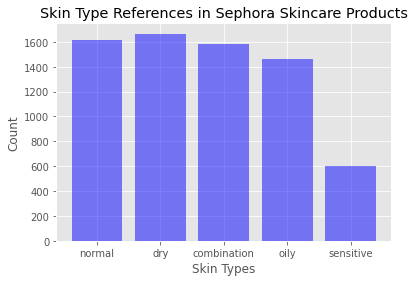

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
 
style.use("ggplot")

skin_types = ["normal","dry", "combination","oily","sensitive"]
st_count = [0,0,0,0,0]

for index in seph_df.index:
  for count, typ in enumerate(skin_types):
    if typ in seph_df.iat[index, 4]:
      st_count[count] += 1

plt.bar(
    skin_types,
    st_count,
    color = "blue", # for green
    align = "center",
    alpha = 0.5,
)

plt.title("Skin Type References in Sephora Skincare Products")
plt.xlabel("Skin Types")
plt.ylabel("Count")

plt.show()

From this bar graph, you can clearly see that the "dry" skin type is the most targeted in Sephora skincare products.

Next I will be focusing on the following question:

3. Which skin type recieved the most loves on the Sephora website?

To tackle this question, I iterated throught the sephora df and added together the number of "loves" from the "loves" column for each skin type. I then made a bar graph from these results.

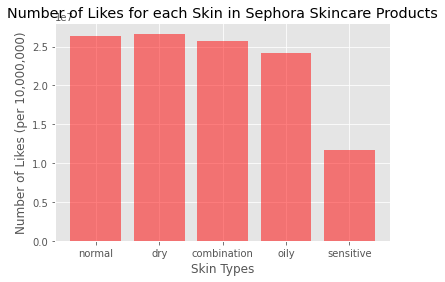

In [ ]:
st_likes = [0,0,0,0,0]

for index in seph_df.index:
  for count, typ in enumerate(skin_types):
    if typ in seph_df.iat[index, 4]:
      st_likes[count] += seph_df.iat[index, 2]

#print(st_likes)

plt.bar(
    skin_types,
    st_likes,
    color = "r", # for green
    align = "center",
    alpha = 0.5,
)

plt.title("Number of Likes for each Skin in Sephora Skincare Products")
plt.xlabel("Skin Types")
plt.ylabel("Number of Likes (per 10,000,000)")

plt.show()

From this bar graph, you can clearly see that the "dry" skin type is the most "loved" from Sephora skincare products.
However, this bar graph made me question whether "dry" just had the most number of "loves" because it was the most targetted out of all skin types. Following this line of thinking, I decided a better measure of finding the "most loved" skin type was the find the skin type with the largest avergae number of "loves".

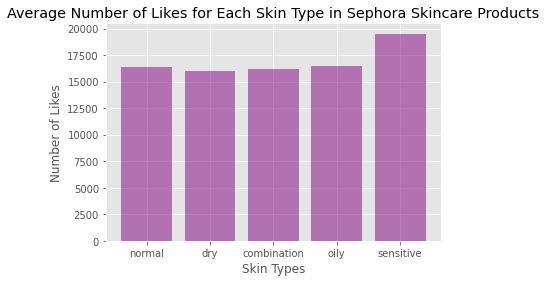

In [ ]:
avg_likes = []
for count, l in enumerate(st_likes):
  avg_likes.append(l/st_count[count])

#print(avg_likes)

plt.bar(
    skin_types,
    avg_likes,
    color = "purple", # for green
    align = "center",
    alpha = 0.5,
)

plt.title("Average Number of Loves for Each Skin Type in Sephora Skincare Products")
plt.xlabel("Skin Types")
plt.ylabel("Number of Loves")

plt.show()

As you can see, using average number of "loves", the "dry" skin type is not longer the "most loved". Rather it is the "sensitive" skin type. However, this result was very suprising to me as, from a previous bar graph, it is clear that the "sensitive" skin type is the least targetted out of all Sephora products. I wanted to visualize this discrepancy and see if there was a similar gap for the other skin types.

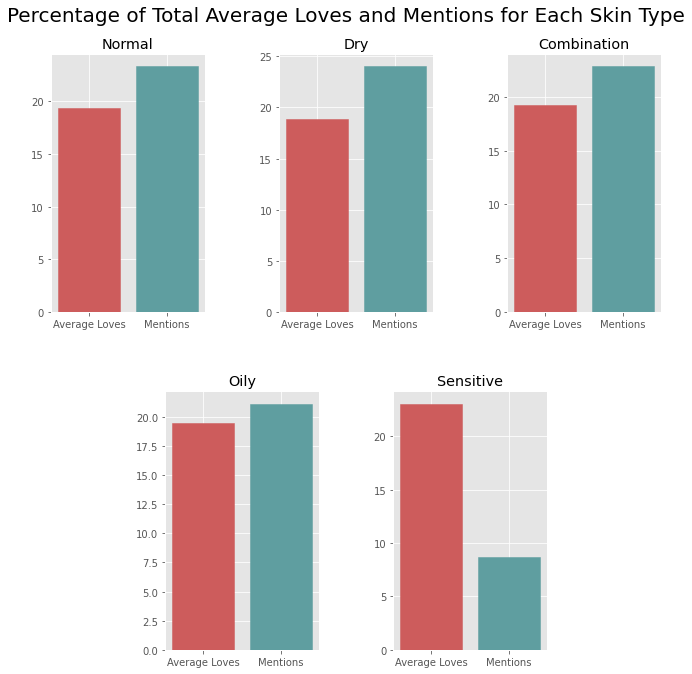

In [ ]:
avg_likes_total = sum(avg_likes)
st_count_total = sum(st_count)

avg_likes_perc = []
for i in avg_likes:
  new = (i/avg_likes_total) * 100
  avg_likes_perc.append(new)

st_count_perc = []
for i in st_count:
  new = (i/st_count_total) * 100
  st_count_perc.append(new)

fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(10)

fig.suptitle('Percentage of Total Average Loves and Mentions for Each Skin Type', fontsize=20)


ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.title.set_text(skin_types[0].title())
ax1 = plt.bar(["Average Loves","Mentions"],[avg_likes_perc[0],st_count_perc[0]])
ax1[0].set_color('indianred')
ax1[1].set_color('cadetblue')

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.title.set_text(skin_types[1].title())
ax2 = plt.bar(["Average Loves","Mentions"],[avg_likes_perc[1],st_count_perc[1]])
ax2[0].set_color('indianred')
ax2[1].set_color('cadetblue')

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.title.set_text(skin_types[2].title())
ax3 = plt.bar(["Average Loves","Mentions"],[avg_likes_perc[2],st_count_perc[2]])
ax3[0].set_color('indianred')
ax3[1].set_color('cadetblue')

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.title.set_text(skin_types[3].title())
ax4 = plt.bar(["Average Loves","Mentions"],[avg_likes_perc[3],st_count_perc[3]])
ax4[0].set_color('indianred')
ax4[1].set_color('cadetblue')

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.title.set_text(skin_types[4].title())
ax5 = plt.bar(["Average Loves","Mentions"],[avg_likes_perc[4],st_count_perc[4]])
ax5[0].set_color('indianred')
ax5[1].set_color('cadetblue')

fig.tight_layout(pad=4.5)
plt.show()

Clearly, the sensitive skin type is the only type where the average loves far outweight its mentions. However, this makes me wonder whether the type of ingredients using in the products targetting different skin types is truly that different. This led me investigate the percentage breakdown of the different ingredient types for each skin type.

I begin this investigation by setting up an empty dictionary and list which will be filled with the number of zeros for each ingredient category to be increased later and the names of each ingredient category, respectively.

In [ ]:
cat_count = {"normal":[], "dry":[],"combination":[],"oily":[],"sensitive":[]}
ing_cat = []

col_count = 0
for col in pc_df:
  ing_cat.append(col)
  col_count += 1

I am then iterating though the sephora df and the paula's choice df to count the ingredient catgories for each skin type and add it to the dictionary.

In [ ]:
for key in cat_count:
  cat_count[key] = [0] * col_count

for index in seph_df.index:
  for typ in skin_types:
    if typ in seph_df.iat[index, 4]:
      for cc, col in enumerate(pc_df):
        for i in pc_df.index:
          if str(pc_df.iat[i,cc]) in ing_df[seph_df.iat[index, 0]].values:
            cat_count[typ][cc] += 1
            #print(cat_count)

#print(cat_count)

{'normal': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'dry': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'oily': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'sensitive': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
{'normal': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'dry': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'oily': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'sensitive': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
{'normal': [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

KeyboardInterrupt: ignored

Lastly, I will be making subplots of pie charts for each skin type showing the ingredient category percentage breakdown.

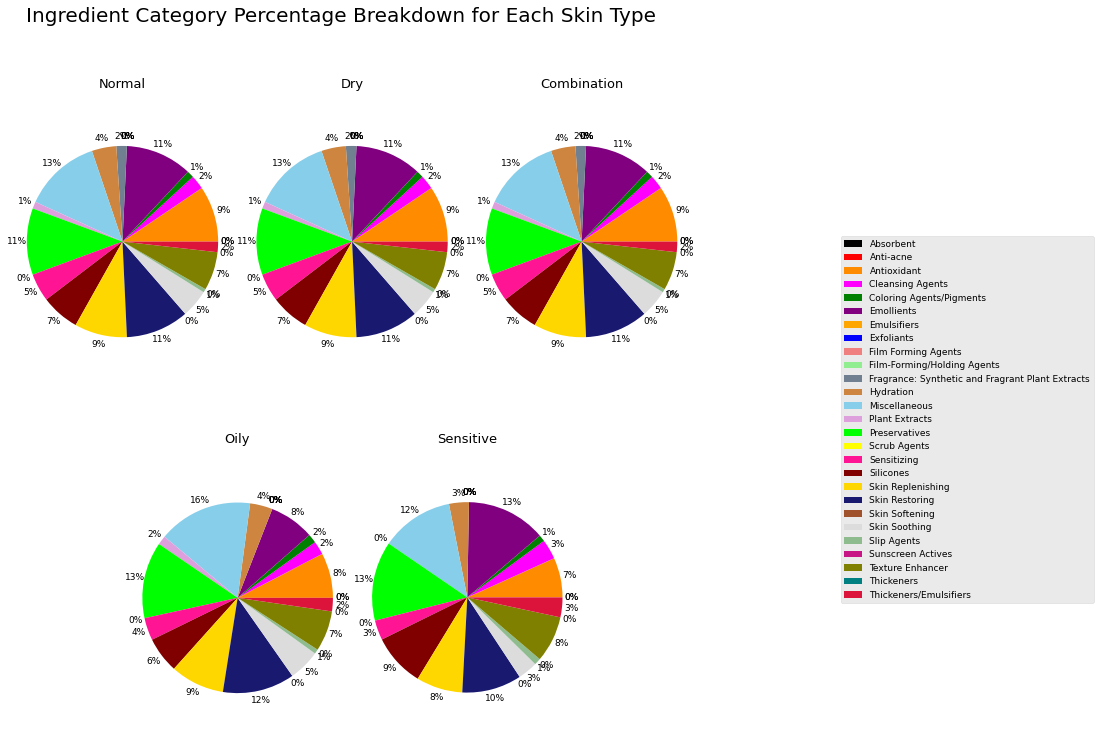

In [ ]:
import matplotlib.pyplot as plt
skin_types = ["normal","dry", "combination","oily","sensitive"]
cat_count = {'normal': [0, 0, 16, 4, 2, 19, 0, 0, 0, 0, 3, 7, 22, 2, 19, 0, 8, 11, 15, 18, 0, 8, 1, 0, 11, 0, 3], 'dry': [0, 0, 16, 4, 2, 19, 0, 0, 0, 0, 3, 7, 22, 2, 19, 0, 8, 11, 15, 18, 0, 8, 1, 0, 11, 0, 3], 'combination': [0, 0, 16, 4, 2, 19, 0, 0, 0, 0, 3, 7, 22, 2, 19, 0, 8, 11, 15, 18, 0, 8, 1, 0, 11, 0, 3], 'oily': [0, 0, 10, 3, 2, 10, 0, 0, 0, 0, 0, 5, 21, 2, 17, 0, 5, 8, 12, 16, 0, 7, 1, 0, 9, 0, 3], 'sensitive': [0, 0, 6, 3, 1, 12, 0, 0, 0, 0, 0, 3, 11, 0, 12, 0, 3, 8, 7, 9, 0, 3, 1, 0, 7, 0, 3]}

colors = ["black","red","darkorange", "magenta", "green", "purple", "orange","blue","lightcoral","lightgreen","slategrey","peru","skyblue","plum",
          "lime","yellow","deeppink","maroon","gold","midnightblue","sienna","gainsboro","darkseagreen","mediumvioletred","olive",
          "teal","crimson"]

fig = plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

plt.suptitle('Ingredient Category Percentage Breakdown for Each Skin Type', fontsize=20)
plt.rcParams['font.size'] = 9

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.title.set_text(skin_types[0].title())
ax1.pie(cat_count['normal'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
ax1.axis('equal') 

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.title.set_text(skin_types[1].title())
ax2.pie(cat_count['dry'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
ax2.axis('equal') 

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.title.set_text(skin_types[2].title())
ax3.pie(cat_count['combination'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
ax3.axis('equal') 

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.title.set_text(skin_types[3].title())
ax4.pie(cat_count['oily'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
ax4.axis('equal') 

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.title.set_text(skin_types[4].title())
ax5.pie(cat_count['sensitive'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
ax5.axis('equal') 


plt.legend(ing_cat, loc="center right", bbox_to_anchor=(3.5, 1.1))
plt.show()

Clearly, although the percentages vary a bit from skin type to skin type, we can see a remarkable similarity between the largest ingredient categories for each skin type. In all skin type, the largest ingredient categories include: "Miscellaneous", "Skin Replenishing", "Emolients", "Skin Restoring", "Preservatives", and "Antioxidants".

Additionally, although, using subplots is very good for comparing the different skin types, the pie charts become rather small to fit the shared space. As a result, I will make individual pie charts for each skin type so the breakdown of ingredient categories is more easily recogniziable.

<Figure size 432x288 with 0 Axes>

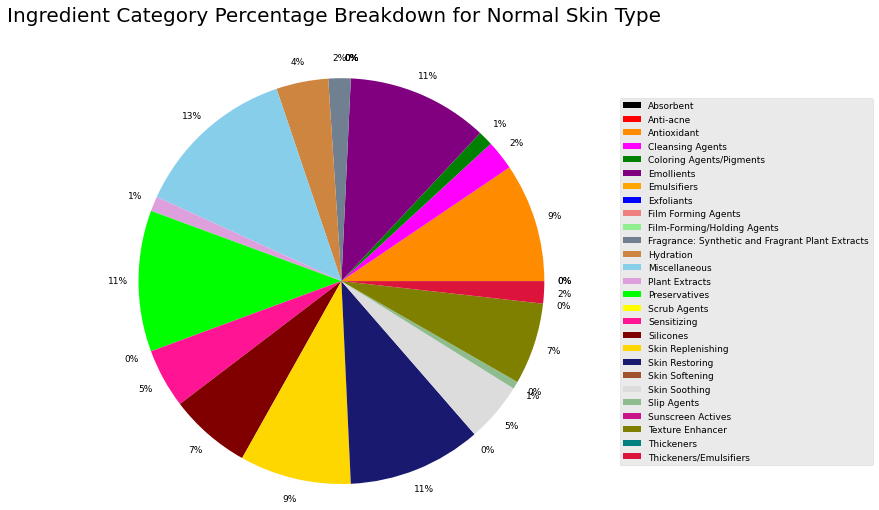

In [ ]:
#Normal

plt.figure()

plt.figure(figsize=(8,8))

plt.suptitle('Ingredient Category Percentage Breakdown for Normal Skin Type', fontsize=20)

plt.pie(cat_count['normal'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
plt.axis('equal')

plt.legend(ing_cat, loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()

<Figure size 432x288 with 0 Axes>

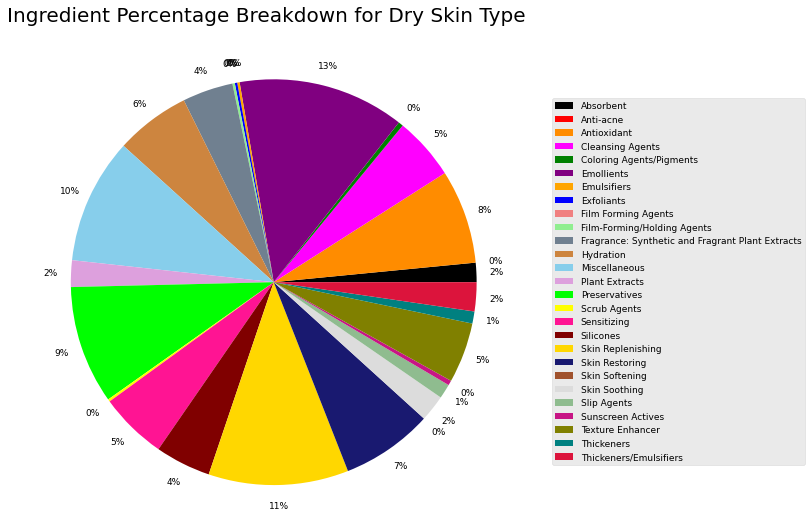

In [ ]:
#Dry

plt.figure()

plt.figure(figsize=(8,8))

plt.suptitle('Ingredient Category Breakdown for Dry Skin Type', fontsize=20)

plt.pie(cat_count['dry'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
plt.axis('equal')

plt.legend(ing_cat, loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()

<Figure size 432x288 with 0 Axes>

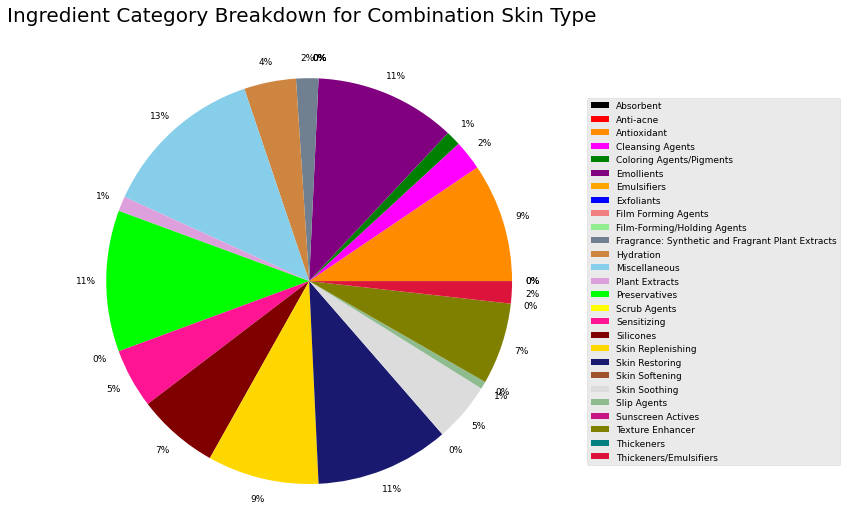

In [ ]:
#Combination

plt.figure()

plt.figure(figsize=(8,8))

plt.suptitle('Ingredient Category Breakdown for Combination Skin Type', fontsize=20)

#plt.title(skin_types[0].title())
plt.pie(cat_count['combination'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
plt.axis('equal')

plt.legend(ing_cat, loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()

<Figure size 432x288 with 0 Axes>

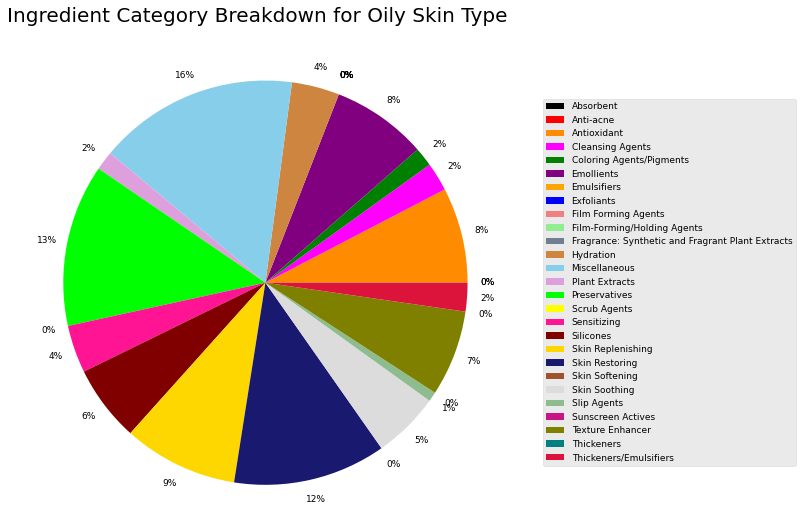

In [ ]:
#Oily

plt.figure()

plt.figure(figsize=(8,8))

plt.suptitle('Ingredient Category Breakdown for Oily Skin Type', fontsize=20)

#plt.title(skin_types[0].title())
plt.pie(cat_count['oily'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
plt.axis('equal')

plt.legend(ing_cat, loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()

<Figure size 432x288 with 0 Axes>

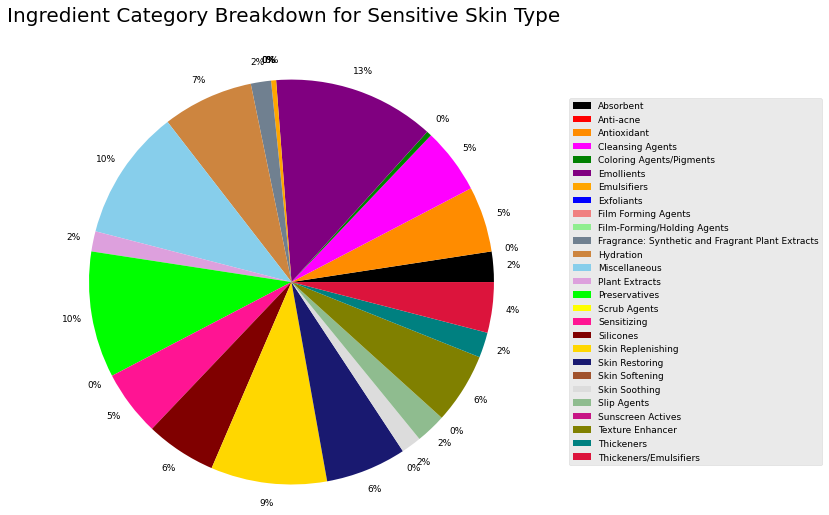

In [ ]:
#Sensitive

plt.figure()

plt.figure(figsize=(8,8))

plt.suptitle('Ingredient Category Breakdown for Sensitive Skin Type', fontsize=20)

#plt.title(skin_types[0].title())
plt.pie(cat_count['sensitive'], labels=None, autopct='%1.0f%%', pctdistance=1.1,colors=colors)
plt.axis('equal')

plt.legend(ing_cat, loc="center right", bbox_to_anchor=(1.7, 0.5))
plt.show()

# Final Findings and Summary
Link to blog post: https://docs.google.com/document/d/1kH4D2fKxZOSUAfZyqss4ALabFgoJQs1gAhm_iGyDovE/edit?usp=sharing





# Sources

**Data Sources**

- Paula's Choice Ingredient Dictionary: https://www.paulaschoice.com/ingredient-dictionary/
- Sephora Website Dataset from Kaggle: https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website

**Other Sources**
- Pandas Website: https://pandas.pydata.org/
- Real Python's Introduction to Beautiful Soup: https://realpython.com/beautiful-soup-web-scraper-python/
- Matplotlib Website: https://matplotlib.org/
